In [130]:
# Import Dependencies
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import and read data.
import pandas as pd

# PlantDisease_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
PlantDisease_df = pd.read_csv('/Users/msi33/Desktop/Homework/Project_4/Plant Project/scaled_images.csv')
PlantDisease_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0.448133,0.415584,0.480349,0.453782,0.427313,0.493333,0.464135,0.451327,0.508850,0.460251,...,0.658120,0.659389,0.727273,0.676596,0.681223,0.755459,0.675105,0.679654,0.753247,Tomato_healthy
1,0.522822,0.532468,0.567686,0.529412,0.541850,0.577778,0.531646,0.544248,0.575221,0.531381,...,0.367521,0.384279,0.437229,0.370213,0.388646,0.445415,0.375527,0.398268,0.450216,Tomato_healthy
2,0.572614,0.593074,0.620087,0.588235,0.612335,0.640000,0.578059,0.601770,0.623894,0.585774,...,0.393162,0.406114,0.419913,0.400000,0.414847,0.432314,0.405063,0.419913,0.437229,Tomato_healthy
3,0.560166,0.562771,0.585153,0.558824,0.563877,0.586667,0.569620,0.575221,0.592920,0.577406,...,0.354701,0.366812,0.380952,0.353191,0.366812,0.384279,0.358650,0.372294,0.389610,Tomato_healthy
4,0.539419,0.541126,0.563319,0.554622,0.563877,0.582222,0.552743,0.570796,0.584071,0.556485,...,0.410256,0.423581,0.441558,0.408511,0.419214,0.441048,0.405063,0.411255,0.432900,Tomato_healthy


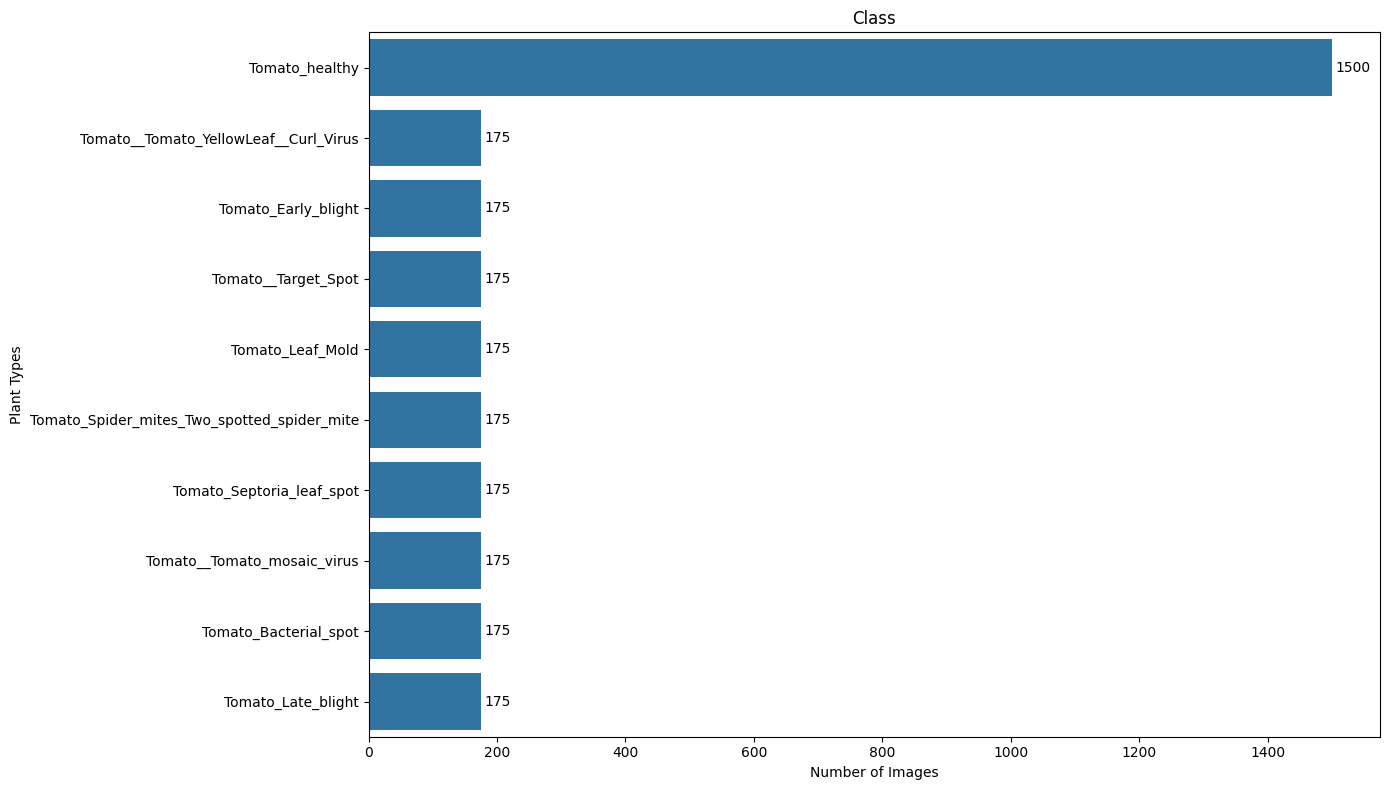

In [131]:
import matplotlib.pyplot as plt
import seaborn 
class_counts = PlantDisease_df['label'].value_counts()

plt.figure(figsize=(14, 8))
x = seaborn.barplot(x=class_counts.values, y=class_counts.index, orient='h')
plt.title('Class')
plt.xlabel('Number of Images')
plt.ylabel('Plant Types')
plt.tight_layout()  

for i, v in enumerate(class_counts.values):
    x.text(v + 5, i, str(v), color='black', va='center')

plt.show()

In [133]:
PlantDisease_df['healthy?'] = (PlantDisease_df['label'] == 'Tomato_healthy').astype(int)
PlantDisease_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,label,healthy?
0,0.448133,0.415584,0.480349,0.453782,0.427313,0.493333,0.464135,0.451327,0.508850,0.460251,...,0.659389,0.727273,0.676596,0.681223,0.755459,0.675105,0.679654,0.753247,Tomato_healthy,1
1,0.522822,0.532468,0.567686,0.529412,0.541850,0.577778,0.531646,0.544248,0.575221,0.531381,...,0.384279,0.437229,0.370213,0.388646,0.445415,0.375527,0.398268,0.450216,Tomato_healthy,1
2,0.572614,0.593074,0.620087,0.588235,0.612335,0.640000,0.578059,0.601770,0.623894,0.585774,...,0.406114,0.419913,0.400000,0.414847,0.432314,0.405063,0.419913,0.437229,Tomato_healthy,1
3,0.560166,0.562771,0.585153,0.558824,0.563877,0.586667,0.569620,0.575221,0.592920,0.577406,...,0.366812,0.380952,0.353191,0.366812,0.384279,0.358650,0.372294,0.389610,Tomato_healthy,1
4,0.539419,0.541126,0.563319,0.554622,0.563877,0.582222,0.552743,0.570796,0.584071,0.556485,...,0.423581,0.441558,0.408511,0.419214,0.441048,0.405063,0.411255,0.432900,Tomato_healthy,1


In [134]:
# Determine the number of unique values in each column.
PlantDisease_df.nunique()

0           159
1           155
2           153
3           154
4           157
           ... 
2349        182
2350        178
2351        182
label        10
healthy?      2
Length: 2354, dtype: int64

In [135]:
df = PlantDisease_df.drop('label', axis=1)

In [136]:
# Separate features and labels
X = df.drop('healthy?', axis=1)
y = df['healthy?']

In [161]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [138]:
# Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [162]:
# Define the model - deep neural net
nn = tf.keras.models.Sequential()
input_dim = len(X.columns)

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="relu", input_dim=input_dim))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


/Users/msi33/anaconda3/envs/pythonDev/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │       117,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,211 (465.67 KB)

 Trainable params: 119,211 (465.67 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [164]:
# Train the model
# fit_model= nn.fit(X_train_scaled, y_train, epochs=100)
fit_model= nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6734 - loss: 0.6287
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.4638
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8490 - loss: 0.3635
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.3568
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8268 - loss: 0.3733
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3417
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8868 - loss: 0.2985
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8851 - loss: 0.2934
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8899 - loss: 0.2749
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8952 - loss: 0.2676
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.3033
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

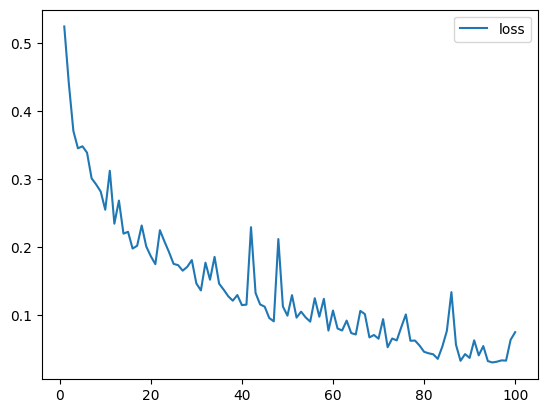

In [165]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

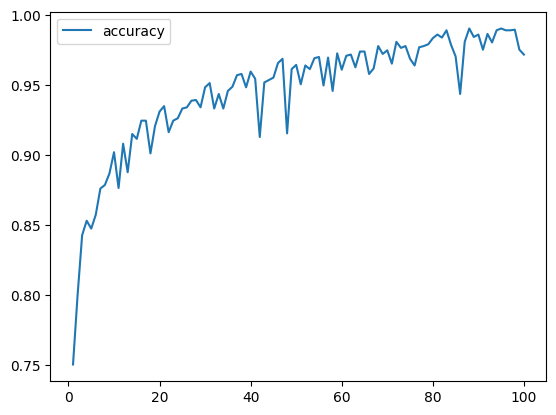

In [166]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [167]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

25/25 - 0s - 7ms/step - accuracy: 0.9441 - loss: 0.1477
Loss: 0.14773735404014587, Accuracy: 0.9440832138061523


In [126]:
nn.save('nn_Tomatodiseases.keras')

In [127]:
loaded_model =  tf.keras.models.load_model("nn_Tomatodiseases.keras")

In [185]:
p = loaded_model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [172]:
pd.DataFrame(p).describe()

,0
count,7.690000e+02
mean,1.123981e-02
std,4.977221e-02
min,1.502968e-08
25%,1.827653e-05
50%,3.474417e-04
75%,4.157776e-03
max,7.538698e-01
